<a href="https://colab.research.google.com/github/suinkangme/A1_COMP472/blob/main/A1_COMP472.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A1 - COMP 472

Hyun Soo Kim 40174913

Suin Kang 40129337

In [73]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.neural_network import MLPClassifier

### Import the MyDrive library from CoLab

In [74]:
from google.colab import drive
drive.mount('/content/drive')

# the directory owns this notebook and dataset
import os
os.chdir('/content/drive/MyDrive/comp472/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Definition of train-test-repetition function

In [77]:
def MLP_base_train_test_repetition(X, y, outputFile, target_names):
  accuracy = []
  macro_avg = []
  weighted_avg = []

  print("\nBase MLP Train-Test Repetition\n", file = outputFile)

  #repeat 5 times
  for i in range (0,5):

    #data is shuffled every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #base MLP
    #initialize new model with same hyperparameters
    model = MLPClassifier(hidden_layer_sizes = (100, 100,), activation = 'logistic', solver = 'sgd')

    #train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #for average accuracy / macro-average f1 score / weighted-average f1 score and variance calculation
    output = classification_report(y_test, y_pred, target_names = target_names, output_dict = True)
    accuracy.append(output['accuracy'])
    macro_avg.append(output['macro avg']['f1-score'])
    weighted_avg.append(output['weighted avg']['f1-score'])

    #print to text file. This would make it easier to validate the result of each model
    print(f'=== Iteration {i+1} === ', file = outputFile)
    print(f"(A) {model}\n", file = outputFile)
    print("(B) Confusion Matrix", file = outputFile)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    print(confusion_matrix_result, file = outputFile)

    print("\n(C,D) Classification Report", file = outputFile)
    print(classification_report(y_test, y_pred, target_names = target_names), file =outputFile)

  #append the calculation in the report
  print('(E) The result after 5 times of train-test repetition:' ,file = outputFile)
  print(f'\tThe average accuracy / variance: {np.mean(accuracy): 6.4f}, {np.var(accuracy): 6.6f}', file = outputFile)
  print(f'\tThe average macro-average f1 score / variance: {np.mean(macro_avg): 6.4f}, {np.var(macro_avg): 6.6f}', file = outputFile)
  print(f'\tThe average weighted-average f1 score / variance: {np.mean(weighted_avg): 6.4f}, {np.var(weighted_avg): 6.6f}', file = outputFile)
  print('\n', file = outputFile)
  outputFile.flush()

In [78]:
def MLP_top_train_test_repetition(param_grid, X, y, outputFile, target_names):
  accuracy = []
  macro_avg = []
  weighted_avg = []

  print("\nTop MLP Train-Test Repetition\n", file = outputFile)

  #repeat 5 times
  for i in range (0,5):

    #data is shuffled every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #top MLP
    #initialize new model with same hyperparameters
    gridcv = sk.model_selection.GridSearchCV(MLPClassifier(), param_grid = param_grid)
    gridcv.fit(X_train, y_train)

    #predict
    y_pred = gridcv.best_estimator_.predict(X_test)

    #for average accuracy / macro-average f1 score / weighted-average f1 score and variance calculation
    output = classification_report(y_test, y_pred, target_names = target_names, output_dict = True)
    accuracy.append(output['accuracy'])
    macro_avg.append(output['macro avg']['f1-score'])
    weighted_avg.append(output['weighted avg']['f1-score'])

    #print to text file. This would make it easier to validate the result of each model
    print(f'=== Iteration {i+1} === ', file = outputFile)
    print(f"(A) Best Parameters: {gridcv.best_params_}", file = outputFile)
    print("(B) Confusion Matrix", file = outputFile)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    print(confusion_matrix_result, file = outputFile)

    print("\n(C,D) Classification Report", file = outputFile)
    print(classification_report(y_test, y_pred, target_names = target_names), file =outputFile)

  #append the calculation in the report
  print('(E) The result after 5 times of train-test repetition:' ,file = outputFile)
  print(f'\tThe average accuracy / variance: {np.mean(accuracy): 6.4f}, {np.var(accuracy): 6.6f}', file = outputFile)
  print(f'\tThe average macro-average f1 score / variance: {np.mean(macro_avg): 6.4f}, {np.var(macro_avg): 6.6f}', file = outputFile)
  print(f'\tThe average weighted-average f1 score / variance: {np.mean(weighted_avg): 6.4f}, {np.var(weighted_avg): 6.6f}', file = outputFile)
  print('\n', file = outputFile)
  outputFile.flush()

## Dataset - 'penguins.csv'
- Goal : prediction of species
(Adelie, Gentoo, Chinstap)

In [79]:
outputFile = open ('penguin-classes.txt', 'w')
warnings.filterwarnings('ignore')

In [80]:
data_penguins = pd.read_csv('penguins.csv')
data_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


#### Data Preprocessing
- data encoding for categorical values: 'island', 'sex' column

In [81]:
from sklearn.preprocessing import OneHotEncoder

island = np.array(data_penguins['island']).reshape(-1, 1)
island_label = OneHotEncoder().fit_transform(island)
data_penguins['island'] = island_label.toarray()

df = pd.DataFrame({'island':['Torgersen','Biscoe','Dream']})
pd.get_dummies(df)

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,1,0,0
2,0,1,0


In [82]:
from sklearn.preprocessing import LabelEncoder

data_penguins['sex'] = LabelEncoder().fit_transform(data_penguins['sex'])

#### Plot the percentage of the instances

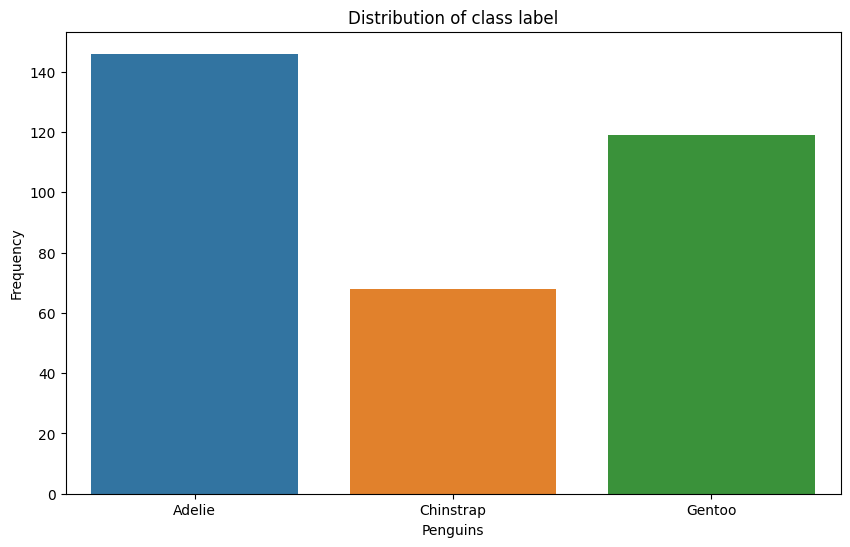

In [83]:
# Check the output class is balanced
penguins_labels = data_penguins['species']

plt.figure(figsize=(10, 6))
sns.countplot(x=penguins_labels)
plt.title('Distribution of class label')
plt.xlabel('Penguins')
plt.ylabel('Frequency')

# save as graphic
plt.savefig('penguin-classes.png')

#### Dataset split into training & test set

In [84]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
scaled_features_penguins = StandardScaler().fit_transform(data_penguins.iloc[:, 1:].values)
X = scaled_features_penguins
y = data_penguins.iloc[:,0].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Train 4 different classifier

##### Classifier 1 - Base-DT

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Base Decision Tree
classifier_1 = DecisionTreeClassifier()
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
penguins_class = data_penguins.columns[0]
penguins_features = list(data_penguins.columns[1:])

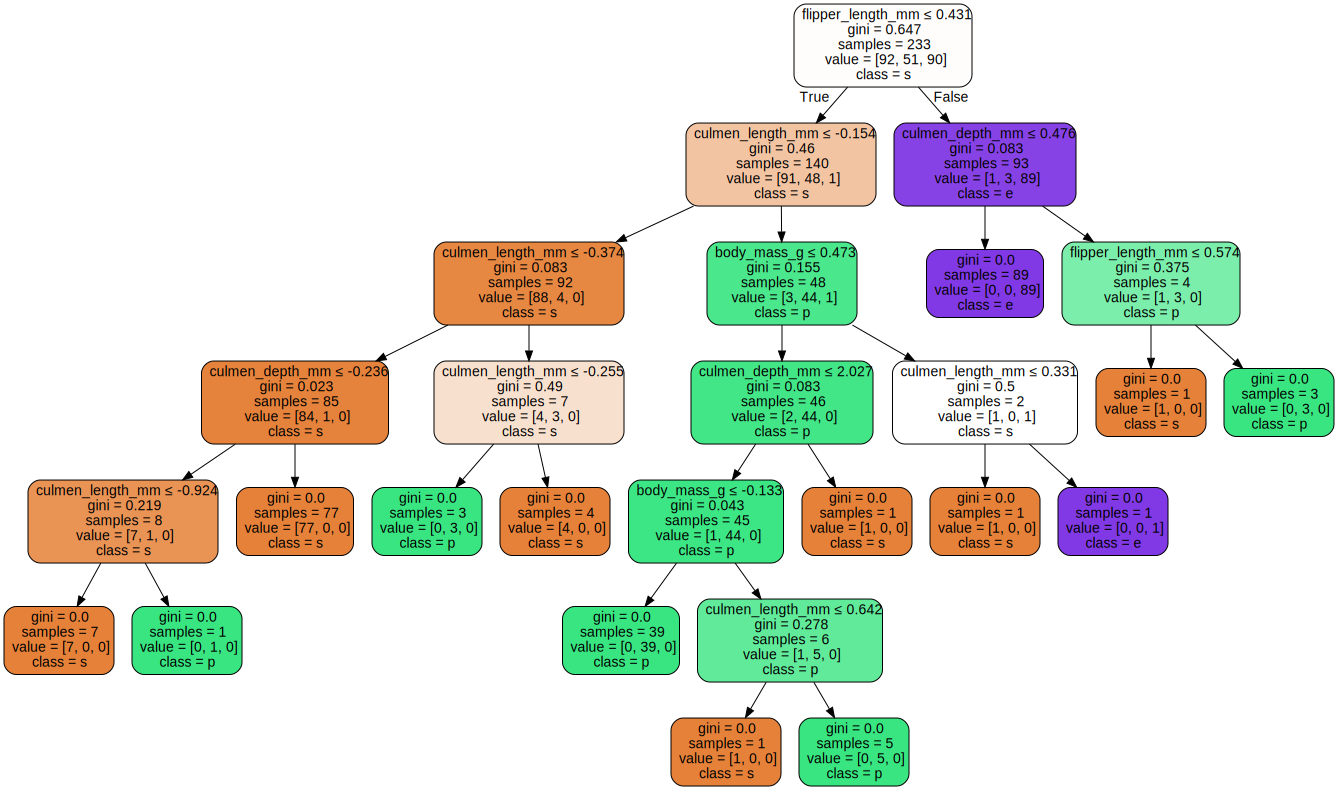

In [88]:
from sklearn import tree

dot_data = tree.export_graphviz(classifier_1,
                feature_names=penguins_features,
                class_names=penguins_class,
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [89]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 1 - Base DT', file = outputFile)
print(classifier_1, file = outputFile)
print('\n', file = outputFile)

In [90]:
# print classification report
y_pred = classifier_1.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print("(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.96      0.85      0.90        54
   Chinstrap       0.70      0.94      0.80        17
      Gentoo       0.97      0.97      0.97        29

    accuracy                           0.90       100
   macro avg       0.87      0.92      0.89       100
weighted avg       0.92      0.90      0.90       100

confusion matrix
 [[46  7  1]
 [ 1 16  0]
 [ 1  0 28]]


In [91]:
# repeat training & prediction 5 times for classifier 1
from sklearn.metrics import accuracy_score, f1_score

accuracy_baseDT = np.zeros(5)
macro_avg_baseDT = np.zeros(5)
weighted_avg_baseDT = np.zeros(5)

for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  classifier_1.fit(X_train, y_train)
  y_pred = classifier_1.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_baseDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_baseDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_baseDT[i] = f1_score(y_test, y_pred, average='weighted')

# compute the average accuracy & variances
print(f'accuracy_baseDT: {accuracy_baseDT}')
Avg_accuracy = (np.sum(accuracy_baseDT))/5
accuracy_variance = np.var(accuracy_baseDT)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}')

# compute the average macro-average F1 & the variance
print(f'macro_avg_baseDT: {macro_avg_baseDT}')
Avg_macro_avg = (np.sum(macro_avg_baseDT))/5
f1_macro_variance = np.var(macro_avg_baseDT)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}')

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_baseDT: {weighted_avg_baseDT}')
Avg_weighted_avg = (np.sum(weighted_avg_baseDT))/5
f1_weighted_variance = np.var(weighted_avg_baseDT)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}')

accuracy_baseDT: [0.98 0.98 0.97 0.98 0.99]
average accuracy: 0.9799999999999999, variance: 4.000000000000007e-05
macro_avg_baseDT: [0.9755814  0.9630303  0.96429741 0.9775641  0.98828569]
average macro-average F1: 0.9737517805266027, variance: 8.669019018545668e-05
weighted_avg_baseDT: [0.97973256 0.98       0.9701867  0.98016026 0.98993181]
average weighted-average F1: 0.9800022656752235, variance: 3.900778019783669e-05


In [92]:
# print the performance result to outputfile
print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

##### Classifier 2 - Top-DT

In [93]:
# Top Decision Tree - decision tree using gridsearch(hyperparameter search)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10]
}

classifier_2 = GridSearchCV(DecisionTreeClassifier(), parameters)
classifier_2.fit(X_train, y_train)

print(f'best parameters: {classifier_2.best_params_}')

best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [94]:
penguins_class = data_penguins.columns[0]
penguins_features = list(data_penguins.columns[1:])

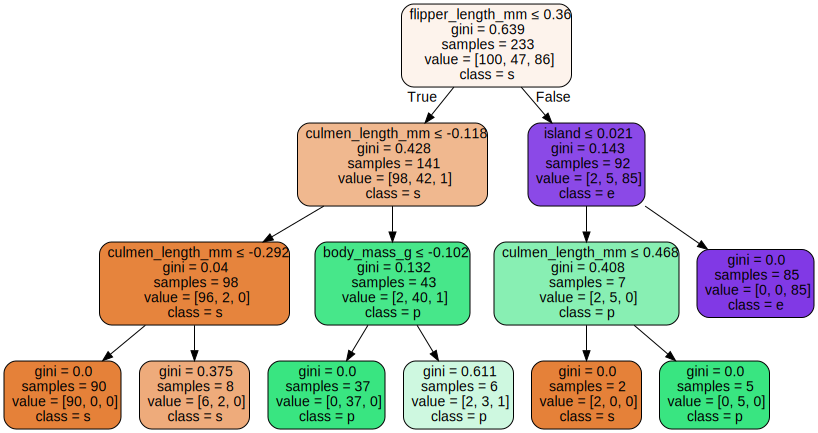

In [95]:
from sklearn.tree import export_graphviz
from IPython.display import display

dot_data = export_graphviz(classifier_2.best_estimator_,
                          feature_names=penguins_features,
                          class_names=penguins_class,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

In [96]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 2 - Top DT', file = outputFile)
print(classifier_2, file = outputFile)
print(f'best parameters: {classifier_2.best_params_}\n', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

In [97]:
# print classification report
y_pred = classifier_2.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
print(classification_report(y_test, y_pred, target_names = ['Adelie', 'Chinstrap', 'Gentoo']), file = outputFile)
confusion_matrix_result =np.array2string(confusion_mat)
print("confusion matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.94      0.96      0.95        46
   Chinstrap       0.90      0.86      0.88        21
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100

confusion matrix
 [[44  2  0]
 [ 3 18  0]
 [ 0  0 33]]


In [98]:
# repeat training & prediction 5 times for classifier 2
from sklearn.metrics import accuracy_score, f1_score

accuracy_baseDT = np.zeros(5)
macro_avg_baseDT = np.zeros(5)
weighted_avg_baseDT = np.zeros(5)

for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  classifier_2.fit(X_train, y_train)
  y_pred = classifier_1.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_baseDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_baseDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_baseDT[i] = f1_score(y_test, y_pred, average='weighted')

# compute the average accuracy & variances
print(f'accuracy_baseDT: {accuracy_baseDT}')
Avg_accuracy = (np.sum(accuracy_baseDT))/5
accuracy_variance = np.var(accuracy_baseDT)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}')

# compute the average macro-average F1 & the variance
print(f'macro_avg_baseDT: {macro_avg_baseDT}')
Avg_macro_avg = (np.sum(macro_avg_baseDT))/5
f1_macro_variance = np.var(macro_avg_baseDT)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}')

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_baseDT: {weighted_avg_baseDT}')
Avg_weighted_avg = (np.sum(weighted_avg_baseDT))/5
f1_weighted_variance = np.var(weighted_avg_baseDT)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}')

accuracy_baseDT: [1.   1.   0.99 1.   1.  ]
average accuracy: 0.998, variance: 1.600000000000003e-05
macro_avg_baseDT: [1.         1.         0.98929226 1.         1.        ]
average macro-average F1: 0.9978584525119178, variance: 1.8344902574843514e-05
weighted_avg_baseDT: [1.         1.         0.98993839 1.         1.        ]
average weighted-average F1: 0.9979876787678768, variance: 1.6197746965015406e-05


In [99]:
# print the performance result to outputfile
print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

##### Classifier 3 - Base-MLP

In [100]:
#Train Classifier 3
mlp_base_penguin = MLPClassifier(hidden_layer_sizes =(100, 100,), activation = 'logistic', solver = 'sgd')
mlp_base_penguin.fit(X_train, y_train)

#print to the output file
print('\n**************************************************************', file = outputFile)
print('(A) Classifier 3 - Base MLP', file = outputFile)
print(mlp_base_penguin, file = outputFile)
print('\n', file = outputFile)

Metrics for Classifier 3

In [102]:
#predict with Base MLP
y_pred_base_mlp = mlp_base_penguin.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_base_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']))
print(confusion_matrix(y_test, y_pred_base_mlp))

#print the result to the output file
print("(B) Confusion Matrix", file = outputFile)
confusion_matrix_result =np.array2string(confusion_matrix(y_test, y_pred_base_mlp))
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print("(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred_base_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)

outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.48      1.00      0.65        48
      Gentoo       0.00      0.00      0.00        16
    Chinstap       0.00      0.00      0.00        36

    accuracy                           0.48       100
   macro avg       0.16      0.33      0.22       100
weighted avg       0.23      0.48      0.31       100

[[48  0  0]
 [16  0  0]
 [36  0  0]]


In [103]:
#repeat train-test 5 times
MLP_base_train_test_repetition(X, y, outputFile, ['Adelie', 'Gentoo', 'Chinstap'])

##### Classifier 4 - Top-MLP

In [104]:
#create grid for each hyperparamter we want to test
activation_grid = np.array(['logistic', 'tanh', 'relu'])
neurons_tuple_grid = np.array([(30, 50,), (10, 10, 10,)], dtype = 'object')
solver_grid = np.array(['adam', 'sgd'])

#create parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': neurons_tuple_grid, 'activation': activation_grid, 'solver': solver_grid}

#create grid cv object and do the search
mlp_top_penguin = MLPClassifier()
gridcv = sk.model_selection.GridSearchCV(mlp_top_penguin, param_grid = param_grid)
gridcv.fit(X_train, y_train)

#print the result here on notebook
print(f'best parameters: {gridcv.best_params_}')

#print the result to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 4 - Top MLP', file = outputFile)
print(f'best parameters: {gridcv.best_params_}\n', file = outputFile)
outputFile.flush()

best parameters: {'activation': 'relu', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Metrics for Classifier 4 - Top MLP

In [105]:
#predict
y_pred_top_mlp = gridcv.best_estimator_.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_top_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']))
print(confusion_matrix(y_test, y_pred_top_mlp))

#print the result to the output file
print("(B) Confusion Matrix", file = outputFile)
confusion_matrix_result =np.array2string(confusion_matrix(y_test, y_pred_top_mlp))
print(confusion_matrix_result, file = outputFile)
print("(C,D) Classification Report", file = outputFile)
print(classification_report(y_test, y_pred_top_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)

outputFile.flush()

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        48
      Gentoo       1.00      1.00      1.00        16
    Chinstap       1.00      1.00      1.00        36

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0  0]
 [ 0 16  0]
 [ 0  0 36]]


In [106]:
MLP_top_train_test_repetition(param_grid, X, y, outputFile,['Adelie', 'Gentoo', 'Chinstap'])

In [107]:
outputFile.close()

## Dataset - 'abalone.csv'
- Goal : prediction of sex

In [43]:
outputFile = open('abalone-performance.txt', 'w')

In [44]:
data_abalone = pd.read_csv('abalone.csv')
data_abalone.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


#### Plot the percentage of the instances

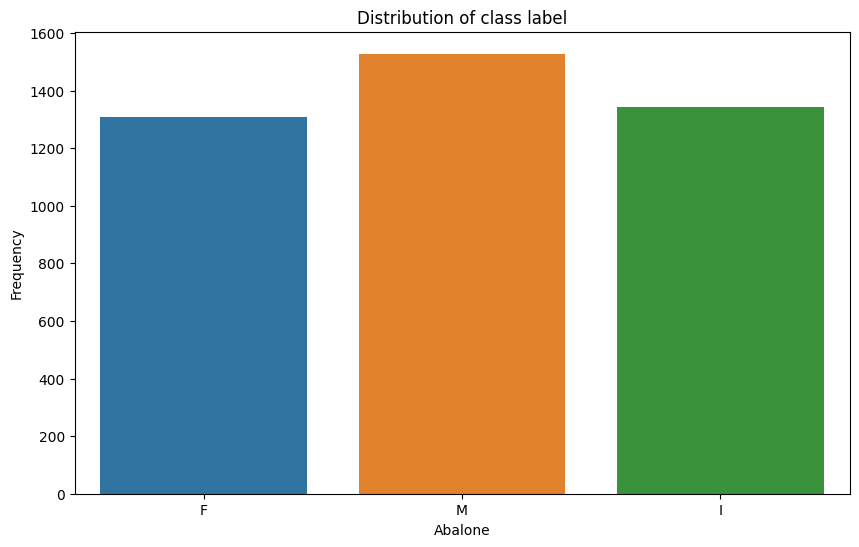

In [45]:
# Check the output class is balanced
abalone_labels = data_abalone['Type']

plt.figure(figsize=(10, 6))
sns.countplot(x=abalone_labels)
plt.title('Distribution of class label')
plt.xlabel('Abalone')
plt.ylabel('Frequency')

# save as graphic
plt.savefig('abalone-classes.png')


#### Dataset split into training & test set

In [46]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
scaled_features_abalone = StandardScaler().fit_transform(data_abalone.iloc[:, 1:].values)

X = scaled_features_abalone
y = data_abalone.iloc[:,0].values

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Train and test 4 different classifiers

##### Classifier 1 - Base-DT

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Base Decision Tree
classifier_1 = DecisionTreeClassifier(max_depth=3)
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [49]:
abalone_class = data_abalone.columns[0]
abalone_features = list(data_abalone.columns[1:])

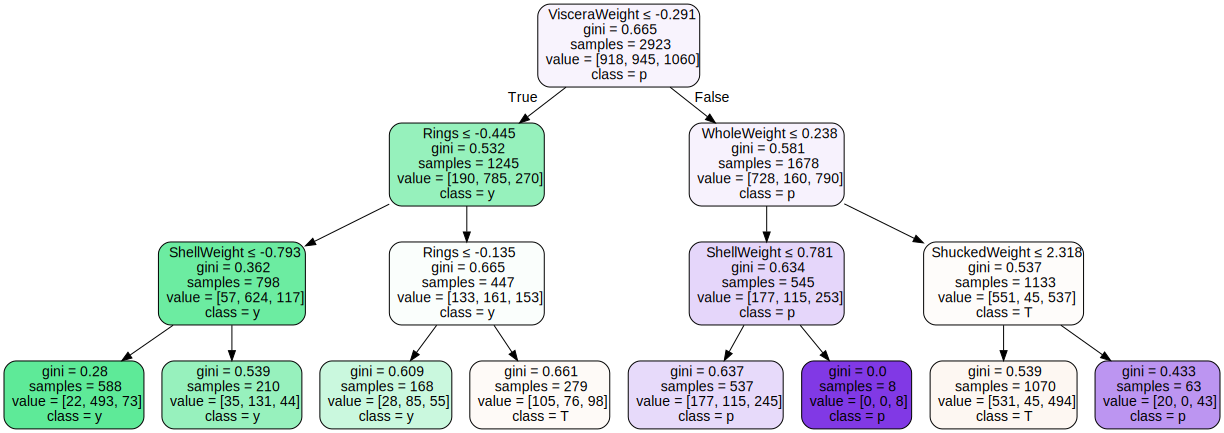

In [50]:
dot_data = tree.export_graphviz(classifier_1,
                feature_names=abalone_features,
                class_names=abalone_class,
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [51]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 1 - Base DT', file = outputFile)
print(classifier_1, file = outputFile)
print('\n', file = outputFile)

In [52]:
# print classification report
y_pred = classifier_1.predict(X_test)
confusion_mat= confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['F', 'M', 'I']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print('(C,D) Classification Report', file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['F', 'M', 'I']), file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.43      0.66      0.52       389
           M       0.70      0.74      0.72       397
           I       0.43      0.23      0.30       468

    accuracy                           0.52      1254
   macro avg       0.52      0.54      0.51      1254
weighted avg       0.52      0.52      0.50      1254

confusion matrix
 [[255  45  89]
 [ 52 293  52]
 [283  79 106]]


In [53]:
# repeat training & prediction 5 times for classifier 1
from sklearn.metrics import accuracy_score, f1_score

accuracy_baseDT = np.zeros(5)
macro_avg_baseDT = np.zeros(5)
weighted_avg_baseDT = np.zeros(5)

for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  classifier_1.fit(X_train, y_train)
  y_pred = classifier_1.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_baseDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_baseDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_baseDT[i] = f1_score(y_test, y_pred, average='weighted')

# compute the average accuracy & variances
print(f'accuracy_baseDT: {accuracy_baseDT}')
Avg_accuracy = (np.sum(accuracy_baseDT))/5
accuracy_variance = np.var(accuracy_baseDT)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}')

# compute the average macro-average F1 & the variance
print(f'macro_avg_baseDT: {macro_avg_baseDT}')
Avg_macro_avg = (np.sum(macro_avg_baseDT))/5
f1_macro_variance = np.var(macro_avg_baseDT)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}')

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_baseDT: {weighted_avg_baseDT}')
Avg_weighted_avg = (np.sum(weighted_avg_baseDT))/5
f1_weighted_variance = np.var(weighted_avg_baseDT)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}')

accuracy_baseDT: [0.53907496 0.51036683 0.53827751 0.54385965 0.53748006]
average accuracy: 0.533811802232855, variance: 0.0001423451335312331
macro_avg_baseDT: [0.43444016 0.43641052 0.4363778  0.53838693 0.48197956]
average macro-average F1: 0.46551899647616113, variance: 0.001648618630387742
weighted_avg_baseDT: [0.4438268  0.43599657 0.44807899 0.53138136 0.49020228]
average weighted-average F1: 0.4698971996589226, variance: 0.001299510049312198


In [54]:
# print the performance result to outputfile
print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}', file = outputFile)
outputFile.flush()

##### Classifier 2 - Top-DT

In [55]:
# Top Decision Tree - decision tree using gridsearch(hyperparameter search)
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10]
}

classifier_2 = GridSearchCV(DecisionTreeClassifier(max_depth=3), parameters)
classifier_2.fit(X_train, y_train)

print(f'best parameters: {classifier_2.best_params_}')

best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [56]:
abalone_class = data_abalone.columns[0]
abalone_features = list(data_abalone.columns[1:])

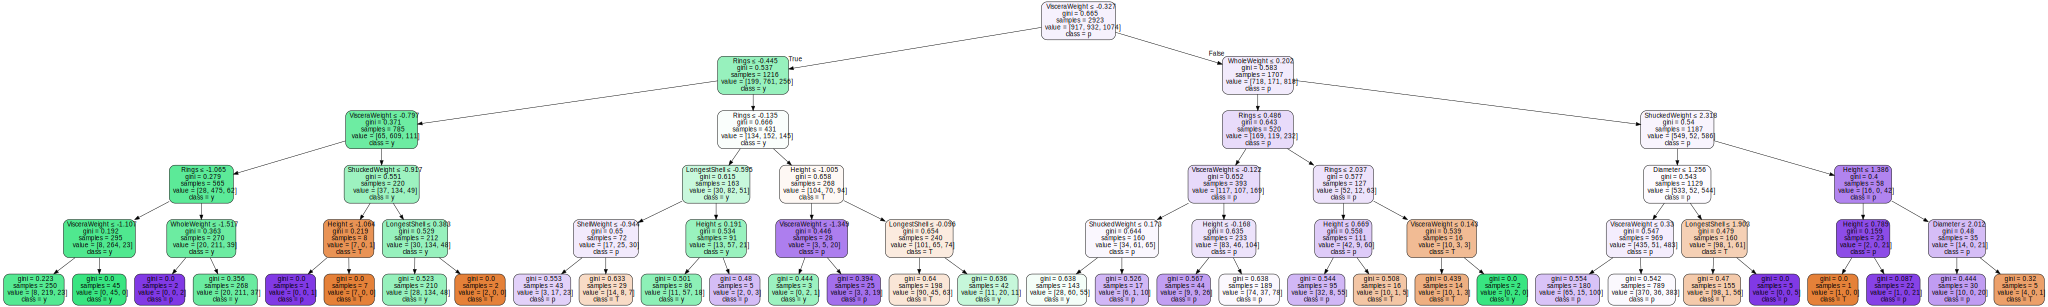

In [57]:
from sklearn.tree import export_graphviz
from IPython.display import display

dot_data = export_graphviz(classifier_2.best_estimator_,
                          feature_names=abalone_features,
                          class_names=abalone_class,
                          filled=True, rounded=True,
                          special_characters=True)

graph = graphviz.Source(dot_data)
display(graph)

In [58]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 2 - Top DT', file = outputFile)
print(classifier_2, file = outputFile)
print(f'best parameters: {classifier_2.best_params_}\n', file = outputFile)
print('\n', file = outputFile)
outputFile.flush()

In [59]:
# print classification report
y_pred = classifier_2.predict(X_test)
confusion_mat= confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['F', 'M', 'I']))
print("confusion matrix\n",confusion_mat)

# print the result to the output file
confusion_matrix_result =np.array2string(confusion_mat)
print("(B) Confusion Matrix", file = outputFile)
print(confusion_matrix_result, file = outputFile)
print('\n', file = outputFile)
print('(C,D) Classification Report', file = outputFile)
print(classification_report(y_test, y_pred, target_names = ['F', 'M', 'I']), file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.44      0.18      0.26       390
           M       0.70      0.77      0.73       410
           I       0.48      0.67      0.56       454

    accuracy                           0.55      1254
   macro avg       0.54      0.54      0.52      1254
weighted avg       0.54      0.55      0.52      1254

confusion matrix
 [[ 72  51 267]
 [ 30 314  66]
 [ 63  85 306]]


In [60]:
# repeat training & prediction 5 times for classifier 2
from sklearn.metrics import accuracy_score, f1_score

accuracy_baseDT = np.zeros(5)
macro_avg_baseDT = np.zeros(5)
weighted_avg_baseDT = np.zeros(5)

for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
  classifier_2.fit(X_train, y_train)
  y_pred = classifier_1.predict(X_test)

  # find the accuracy for each iteration and store the value
  accuracy_baseDT[i] = accuracy_score(y_test, y_pred)
  macro_avg_baseDT[i] = f1_score(y_test, y_pred, average='macro')
  weighted_avg_baseDT[i] = f1_score(y_test, y_pred, average='weighted')

# compute the average accuracy & variances
print(f'accuracy_baseDT: {accuracy_baseDT}')
Avg_accuracy = (np.sum(accuracy_baseDT))/5
accuracy_variance = np.var(accuracy_baseDT)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}')

# compute the average macro-average F1 & the variance
print(f'macro_avg_baseDT: {macro_avg_baseDT}')
Avg_macro_avg = (np.sum(macro_avg_baseDT))/5
f1_macro_variance = np.var(macro_avg_baseDT)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}')

# compute the average weighted-average F1 & the variance
print(f'weighted_avg_baseDT: {weighted_avg_baseDT}')
Avg_weighted_avg = (np.sum(weighted_avg_baseDT))/5
f1_weighted_variance = np.var(weighted_avg_baseDT)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}')

accuracy_baseDT: [0.53189793 0.55502392 0.53668262 0.55502392 0.55821372]
average accuracy: 0.5473684210526315, variance: 0.00011767129873400306
macro_avg_baseDT: [0.48444647 0.49469416 0.47537124 0.4974956  0.50590202]
average macro-average F1: 0.49158190013688596, variance: 0.0001126847428001552
weighted_avg_baseDT: [0.48585285 0.50741132 0.48837785 0.50497501 0.514916  ]
average weighted-average F1: 0.500306605044407, variance: 0.00012738233061183603


In [61]:
# print the performance result to outputfile
print('\n(E) The result after 5 times of train-test repetition:' ,file = outputFile)
print(f'average accuracy: {Avg_accuracy}, variance: {accuracy_variance}', file = outputFile)
print(f'average macro-average F1: {Avg_macro_avg}, variance: {f1_macro_variance}', file = outputFile)
print(f'average weighted-average F1: {Avg_weighted_avg}, variance: {f1_weighted_variance}', file = outputFile)
outputFile.flush()

##### Classifier 3 - Base-MLP

In [62]:
#Train Classifier 3
mlp_base_abalone = MLPClassifier(hidden_layer_sizes =(100, 100,), activation = 'logistic', solver = 'sgd')
mlp_base_abalone.fit(X_train, y_train)

#print to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 3 - Base MLP', file = outputFile)
print(mlp_base_abalone, file = outputFile)
print('\n', file = outputFile)

Metrics for Classifier 3

In [63]:
#predict with Base MLP
y_pred_base_mlp = mlp_base_abalone.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_base_mlp, target_names = ['F', 'M', 'I']))
print(confusion_matrix(y_test, y_pred_base_mlp))

#print the result to the output file
print(classification_report(y_test, y_pred_base_mlp, target_names = ['F', 'M', 'I']), file = outputFile)
confusion_matrix_result = np.array2string(confusion_matrix(y_test, y_pred_base_mlp))
print(confusion_matrix_result, file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.43      0.09      0.15       384
           M       0.64      0.79      0.71       401
           I       0.46      0.67      0.55       469

    accuracy                           0.53      1254
   macro avg       0.51      0.52      0.47      1254
weighted avg       0.51      0.53      0.48      1254

[[ 34  68 282]
 [  0 317  84]
 [ 45 110 314]]


In [64]:
MLP_base_train_test_repetition(X, y, outputFile, ['F', 'M', 'I'])


Base MLP Train-Test Repetition



##### Classifier 4 - Top-MLP

In [68]:
#create grid for each hyperparamter we want to test
activation_grid = np.array(['logistic', 'tanh', 'relu'])
neurons_tuple_grid = np.array([(30, 50,), (10, 10, 10,)])
solver_grid = np.array(['adam', 'sgd'])

#create parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': neurons_tuple_grid, 'activation': activation_grid, 'solver': solver_grid}

#create grid cv object and search
mlp_top_abalone = MLPClassifier()
gridcv = sk.model_selection.GridSearchCV(mlp_top_abalone, param_grid = param_grid)
gridcv.fit(X_train, y_train)

#print the result here on notebook
print(f'best parameters: {gridcv.best_params_}')

#print the result to the output file
print('**************************************************************', file = outputFile)
print('(A) Classifier 4 - Top MLP', file = outputFile)
print(f'best parameters: {gridcv.best_params_}\n', file = outputFile)
outputFile.flush()

best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Metrics for Classifier 4

In [69]:
y_pred_top_mlp = gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_top_mlp, target_names = ['F', 'M', 'I']))
print(confusion_matrix(y_test, y_pred_top_mlp))

print(classification_report(y_test, y_pred_top_mlp, target_names = ['F', 'M', 'I']), file = outputFile)
confusion_matrix_result = np.array2string(confusion_matrix(y_test, y_pred_top_mlp))
print(confusion_matrix_result, file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.43      0.42      0.42       384
           M       0.71      0.80      0.75       401
           I       0.48      0.44      0.46       469

    accuracy                           0.55      1254
   macro avg       0.54      0.55      0.54      1254
weighted avg       0.54      0.55      0.54      1254

[[160  47 177]
 [ 33 320  48]
 [177  86 206]]


In [70]:
MLP_top_train_test_repetition(param_grid, X, y, outputFile, ['F', 'M', 'I'])

In [71]:
outputFile.close()